<a href="https://colab.research.google.com/github/FerminOrtega/Analisis-Datos-Pandas/blob/master/Analisis_datos_Blockchain_Graficos_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de datos de Blockchain - Gráficos Python
### Fermín Ortega Domínguez

---


Los datos que se han obtenido son las estadisticas que ofrece la página de https://www.blockchain.com/
se han obtenido los datos desde que Blockchain empezó hasta ahora, esta información es:
* Precio de mercado
* Número de Transacciones
* Comision por transacción
* Dificultad de Minado
* Beneficio de los mineros

Estos datos se han juntado en un fichero .csv y se han obtenido los datos desde la fecha 1/3/2009 y se han ido recopilando datos en los intervalos de dos meses hasta las fechas mas actuales.


---

Para los gráficos que se van a representar a continuación se han ido consultado a traves de la página https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html



## Importar Librerías
Importamos las librerías necesarias, las mas importantes para este documento son pandas, numpy y matplotlib

In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
matplotlib.style.use('ggplot')

## Ajustar datos
Leemos el fichero que hemos generado y creamos un dataframe

Añadimos al dataframe una columna fecha donde solo tiene el año del registro para poder trabajar mas comodamente con el documento

In [0]:
fichero = "AnalisisBlockchain.csv"
datos = pd.read_csv(fichero, sep=",")
datos['year'] = pd.DatetimeIndex(datos['fecha']).year
fechas = pd.DatetimeIndex(datos.fecha)


## Gráficos

### Gráfico **Pie**
Grafico en modo de Pie de el porcentaje de Transacciones por años

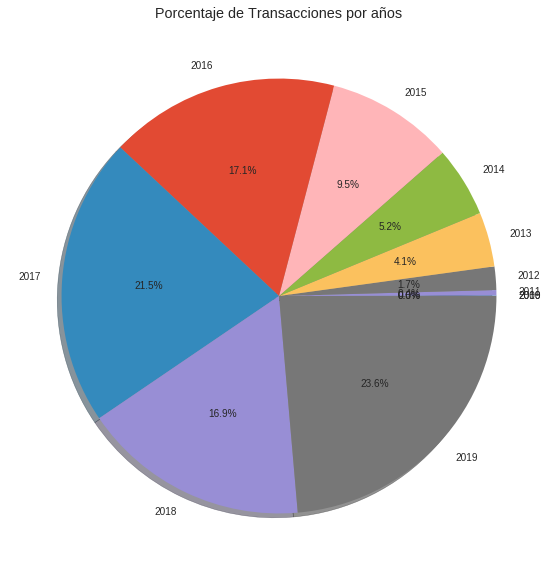

In [0]:
lista = datos.groupby(['year'])['transacciones'].mean()
vendedores = lista.plot(kind = 'pie', figsize = (10, 10), title = "Porcentaje de Transacciones por años", autopct='%1.1f%%', shadow = True).set_ylabel('')

### Gráfico **Line**
Para este gráfico es de tipo **line**, lo primero generamos el grafico  ```ax = plt.gca()``` y luego vamos añadiendo las lineas que queramos añadir al grafico estableciendo la variable "x" y la variable "y"

<function matplotlib.pyplot.show>

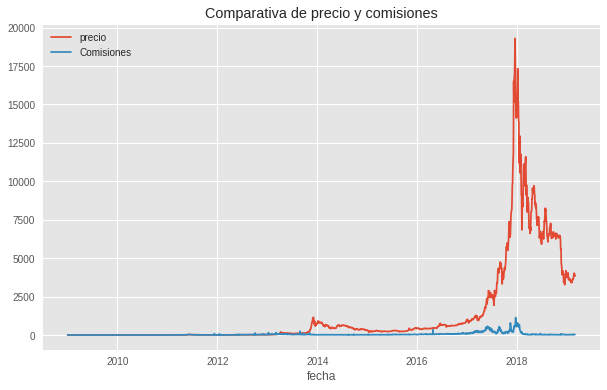

In [0]:
ax = plt.gca()
datos.plot(kind='line', x = fechas, y='precio', ax=ax, figsize = (10, 6), title="Comparativa de precio y comisiones")
datos.plot(kind='line', x = fechas, y='Comisiones', ax=ax, figsize = (10, 6))
plt.show

Para este otro gráfico, mostramos que las lineas tienen estan rellenar con un color algo transparente, esto es debido a que es un grñafico de tipo **area**

<function matplotlib.pyplot.show>

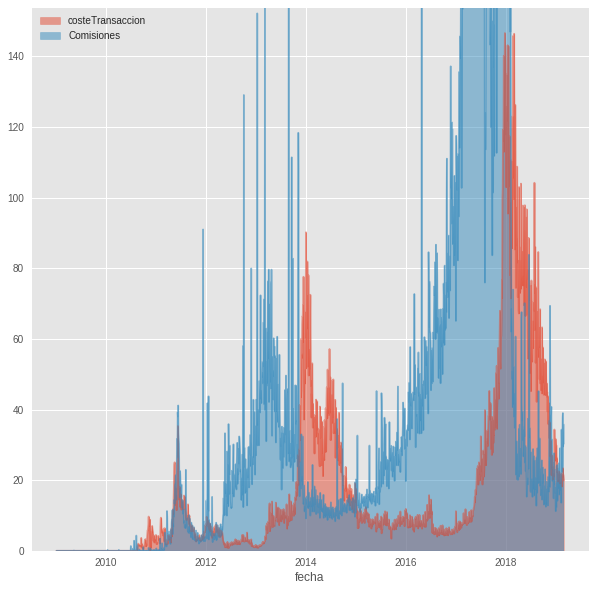

In [0]:
ax = plt.gca()
datos.plot(kind='area', x = fechas, y='costeTransaccion', ax=ax, figsize = (10, 10), stacked=False)
datos.plot(kind='area', x = fechas, y='Comisiones', ax=ax, figsize = (10, 10), stacked=False)
plt.show

### Gráfico **Bar**
Se muestra un grafico de tipo **bar**(explicado en documentos anteriores), los datos estan agrupados por años pero lo que se muestra es la dificultad de minado, esto se consigue usando el groupby del dataframe

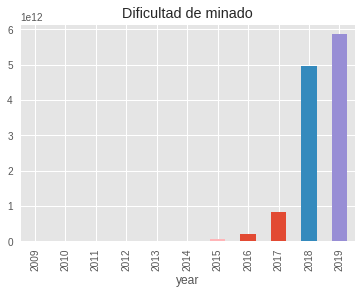

In [0]:
datos.groupby(['year'])['dificultadMinado'].mean().plot(kind='bar', title ="Dificultad de minado")

Para este caso se muestra un grafico de comparación de barras lo unico que tenermos que hacer es, en el dataframe añadir los campos que queramos, sin tocar la agrupacion "groupby"

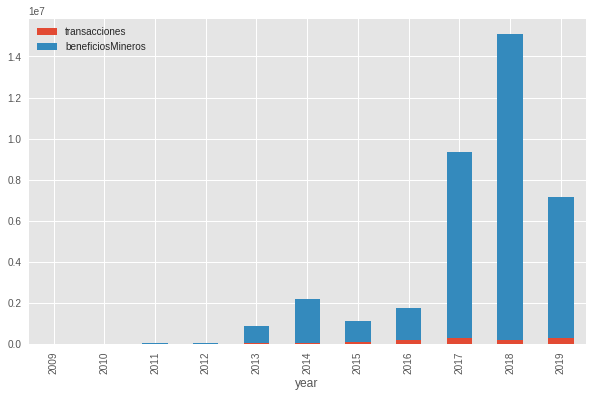

In [0]:
datos.groupby(['year'])['transacciones', 'beneficiosMineros'].mean().plot(kind='bar',stacked=True, figsize = (10, 6), title"Comparativa entre las transacciones y el benefico de los mineros")

### Matriz de gráficos
Para este ejemplo vamos a hacer una matriz de graficos, con esto lo que obtenemos en una matriz donde podemos ver todas las posibiidades de comparación de los datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ae3820c50>,
      dtype=object)

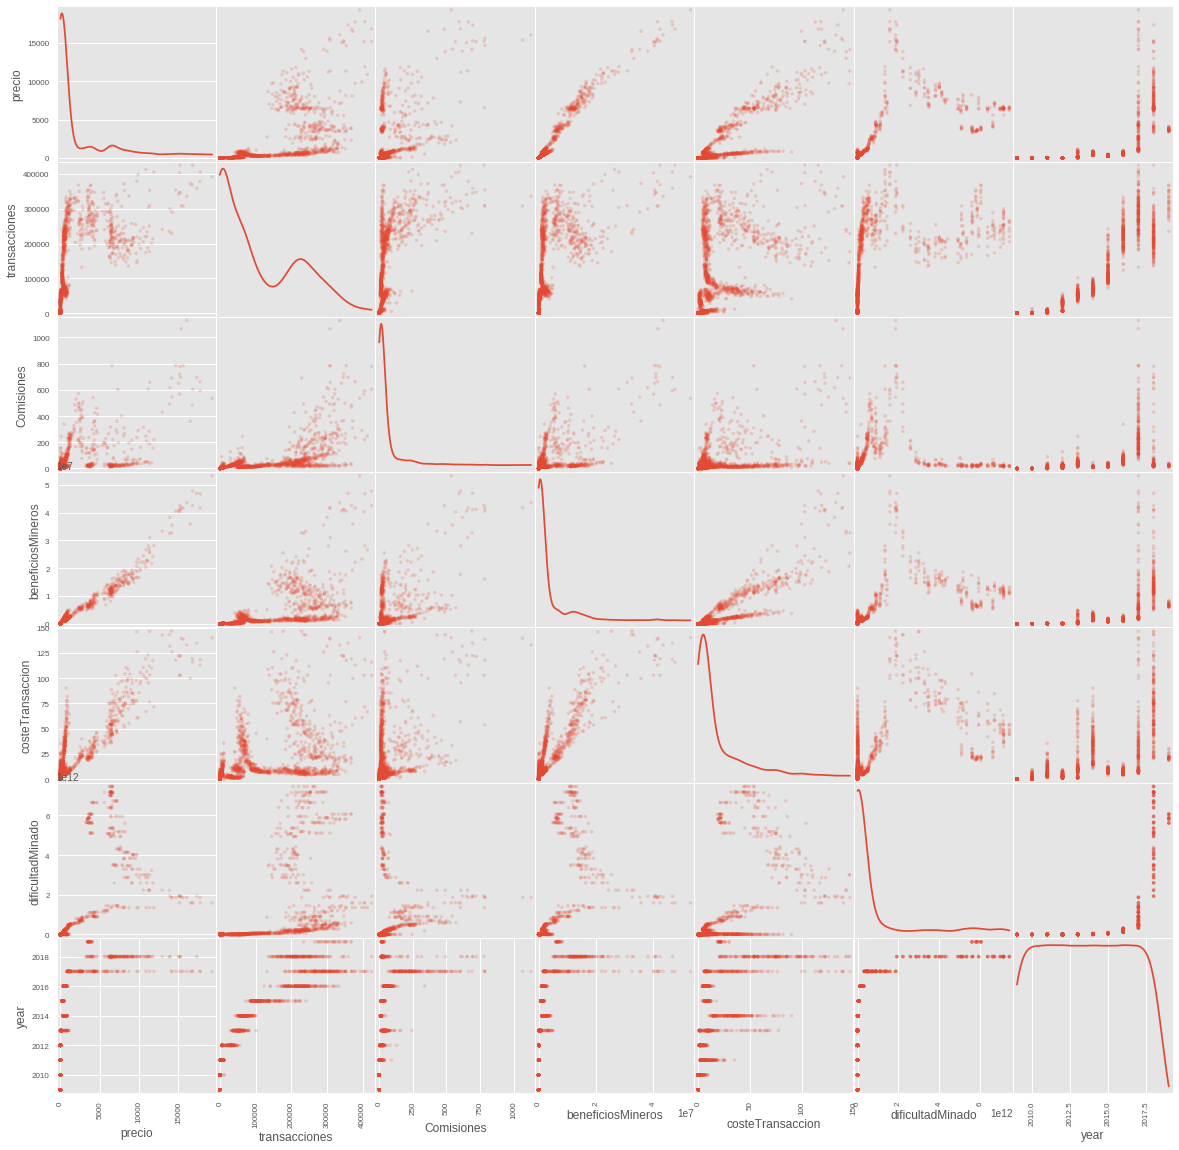

In [0]:
from pandas.plotting import scatter_matrix

scatter_matrix(datos, alpha=0.2, figsize=(20, 20), diagonal='kde')

### Gráfico **Boxplot**
El siguente gráfico es de tipo boxplot, lo que se ha realizado es crear un dataframe con los datos que queremos mostrar de nuestro dataframe original

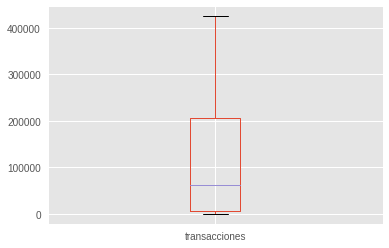

In [0]:
df = pd.DataFrame(datos.transacciones)
plt.figure();
bp = df.boxplot()